# TODO: TITLE

## Introduction

Many people in the world suffer from heart disease. Narrowing of blood vessels usually implies heart disease, which is related to several factors such as age, angina, blood pressure, and serum cholesterol levels. Heart problems are common in older adults due to aging arteries (Heart Health and Aging, n.d.). Coronary artery disease is a heart condition with angina. Blood pressure can reflect the health of blood vessels (High Blood Pressure Symptoms, Causes, and Problems | cdc.gov, 2021), while serum cholesterol values can also indicate potential blood flow restrictions in blood vessels (Warning Signs and Symptoms of Heart Disease, n.d.). So,
	 **What is the predictive status of vessel stenosis based on patient age, type of chest pain, resting blood pressure, and serum cholesterol values?**
To answer the question, this project will conduct a classification prediction on the vessel stenosis with a random dataset *Reprocessed Hungarian* (Machine Learning Repository, 1988) which contains all the required variables above.

## Preliminary Data Analysis

- Demonstrate dataset can be read into R
- Clean and wrangle data
- Summarize data in at least one table
- Vizualize the data with at least one plot

In [2]:
# Load libraries
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [70]:
# Read raw data into R
heart_data_raw <- read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/reprocessed.hungarian.data",
                                delim = " ",
                                col_names = FALSE)
# Map column names in accordance with https://archive.ics.uci.edu/ml/datasets/Heart+Disease
colnames(heart_data_raw) <- c("age", 
                              "sex", 
                              "cp", 
                              "trestbps", 
                              "chol", 
                              "fbs", 
                              "restecg",
                              "thalach", 
                              "exang", 
                              "oldpeak", 
                              "slope", 
                              "ca", 
                              "thal", 
                              "num")
head(heart_data_raw)

Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: " "
dbl (14): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
40,1,2,140,289,0,0,172,0,0.0,-9,-9,-9,0
49,0,3,160,180,0,0,156,0,1.0,2,-9,-9,1
37,1,2,130,283,0,1,98,0,0.0,-9,-9,-9,0
48,0,4,138,214,0,0,108,1,1.5,2,-9,-9,3
54,1,3,150,-9,0,0,122,0,0.0,-9,-9,-9,0
39,1,3,120,339,0,0,170,0,0.0,-9,-9,-9,0


In [195]:

heart_data <- heart_data_raw |>
    mutate(sex = recode(sex, 
                        `0` = "female", 
                        `1` = "male")) |>
    mutate(cp = recode(cp, 
                       `1` = "typical angina",
                       `2` = "atypical angina",
                       `3` = "non-anginal pain",
                       `4` = "asymptomatic")) |>
    mutate(fbs = recode(fbs, 
                        `0` = FALSE, 
                        `1` = TRUE)) |>
    mutate(restecg = recode(restecg, 
                            `0` = "normal", 
                            `1` = "abnormality", 
                            `2` = "ventricular hypertrophy")) |>
    mutate(exang = recode(exang, 
                          `0` = FALSE, 
                          `1` = TRUE)) |>
    mutate(slope = recode(slope, 
                          `1` = "upsloping",
                          `2` = "flat",
                          `3` = "downsloping")) |>
    mutate(ca = ifelse(ca < 0, NA, ca)) |>
    mutate(thal = recode(thal, 
                         `3` = "normal", 
                         `6` = "fixed defect", 
                         `7` = "reversable defect")) |>
    mutate(num = recode(num, 
                        `0` = "<50% narrowing", 
                        `1` = ">50% narrowing")) |>
    mutate(chol = ifelse(chol < 0, NA, chol)) |>
    mutate(thalach = ifelse(thalach < 0, NA, thalach)) |>
    mutate(age = ifelse(age < 0, NA, age)) |>
    mutate(trestbps = ifelse(trestbps < 0, NA, age))

head(heart_data)

Warning message:
“Unreplaced values treated as NA as `.x` is not compatible.
Please specify replacements exhaustively or supply `.default`.”
Warning message:
“Unreplaced values treated as NA as `.x` is not compatible.
Please specify replacements exhaustively or supply `.default`.”
Warning message:
“Unreplaced values treated as NA as `.x` is not compatible.
Please specify replacements exhaustively or supply `.default`.”
Warning message:
“Unreplaced values treated as NA as `.x` is not compatible.
Please specify replacements exhaustively or supply `.default`.”
Warning message:
“Unreplaced values treated as NA as `.x` is not compatible.
Please specify replacements exhaustively or supply `.default`.”
Warning message:
“Unreplaced values treated as NA as `.x` is not compatible.
Please specify replacements exhaustively or supply `.default`.”


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<lgl>,<chr>,<dbl>,<lgl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
40,male,atypical angina,40,289,FALSE,normal,172,FALSE,0.0,NA,NA,NA,<50% narrowing
49,female,non-anginal pain,49,180,FALSE,normal,156,FALSE,1.0,flat,NA,NA,>50% narrowing
37,male,atypical angina,37,283,FALSE,abnormality,98,FALSE,0.0,NA,NA,NA,<50% narrowing
48,female,asymptomatic,48,214,FALSE,normal,108,TRUE,1.5,flat,NA,NA,NA
54,male,non-anginal pain,54,NA,FALSE,normal,122,FALSE,0.0,NA,NA,NA,<50% narrowing
39,male,non-anginal pain,39,339,FALSE,normal,170,FALSE,0.0,NA,NA,NA,<50% narrowing


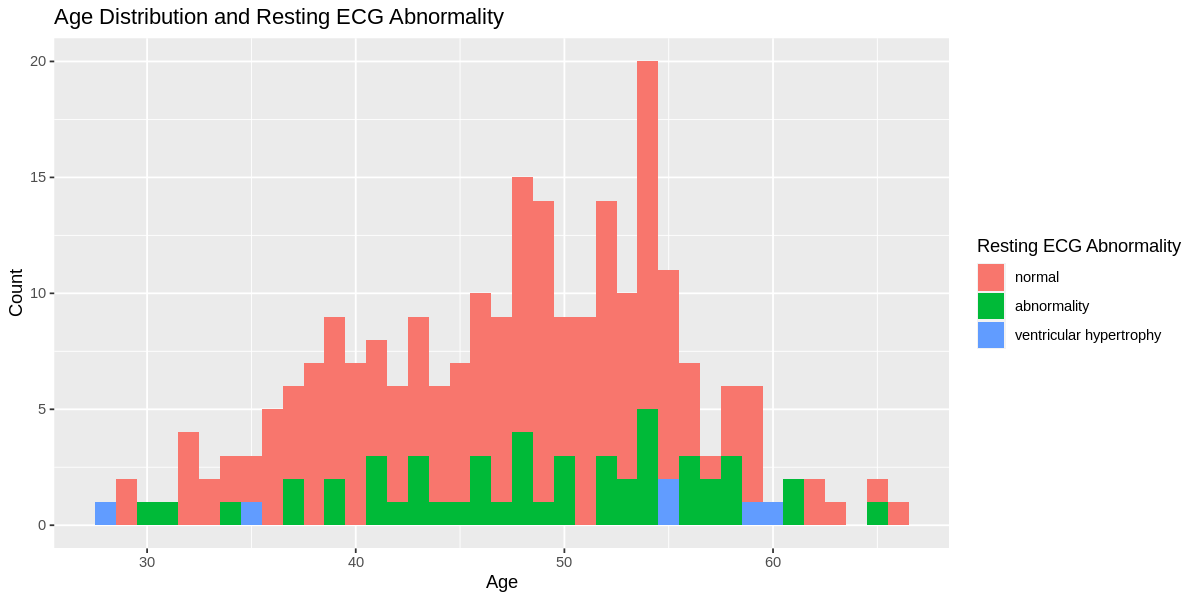

In [216]:
options(repr.plot.height = 5, repr.plot.width = 10)

age_vs_ecg_plot <- heart_data |>
    filter(!is.na(restecg)) |>
    ggplot(aes(x = age, fill = as_factor(restecg))) +
    geom_histogram(position = "identity", binwidth = 1) +
    labs(fill = "Resting ECG Abnormality") +
    xlab("Age") +
    ylab("Count") +
    ggtitle("Age Distribution and Resting ECG Abnormality")

age_vs_ecg_plot

Warning message:
“Removed 24 rows containing missing values (geom_point).”


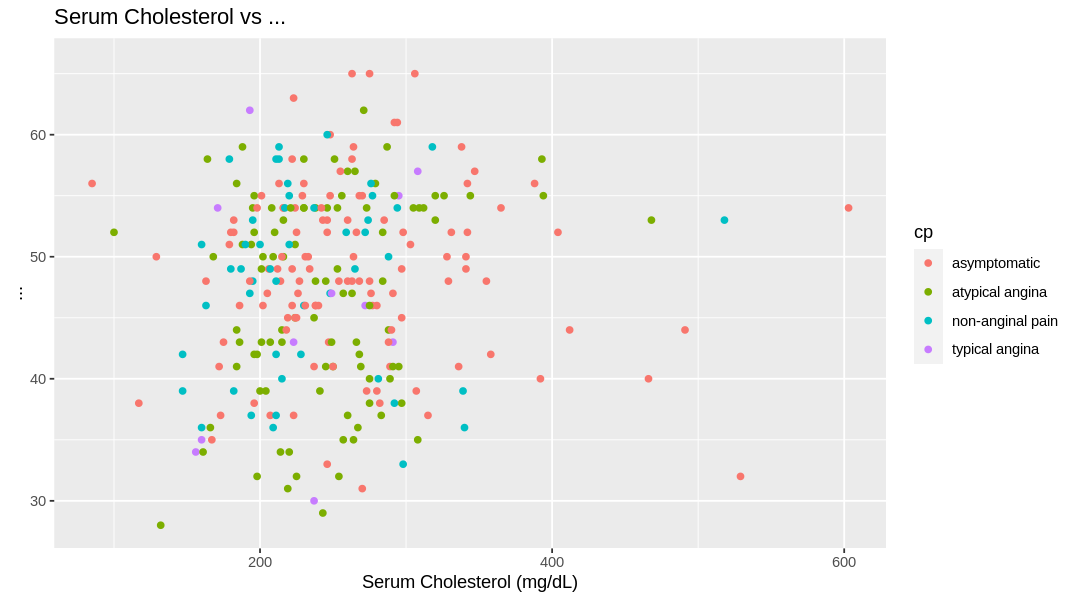

In [212]:
options(repr.plot.height = 5, repr.plot.width = 9)

chol_vs_rhr_plot <- heart_data |>
    ggplot(aes(x = chol, y = trestbps, color = cp)) +
    geom_point() +
    xlab("Serum Cholesterol (mg/dL)") +
    ylab("...") +
    ggtitle("Serum Cholesterol vs ...")

chol_vs_rhr_plot

## Methods
- Explain how we will conduct our data analysis and what variables/columns we will use
    - Age
    - Serum choloesterol
    - Chest pain type
    - Resting blood pressure
One of the ways we plan to visiualize our results is using a scatterplot, with blood pressure and cholesterol on either axis, while the type of chest pain
will be distinguished by different colors for each data point.

## Expected Outcomes
- What do we expect to find?
- What impact could such findings have?
- What future questions could this lead to?